In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad_vec, simpson, trapezoid
from scipy.special import roots_legendre

# Zadanie 1

$ \int_{0}^{1} \frac{4}{1 + x^2} \, dx = \pi $

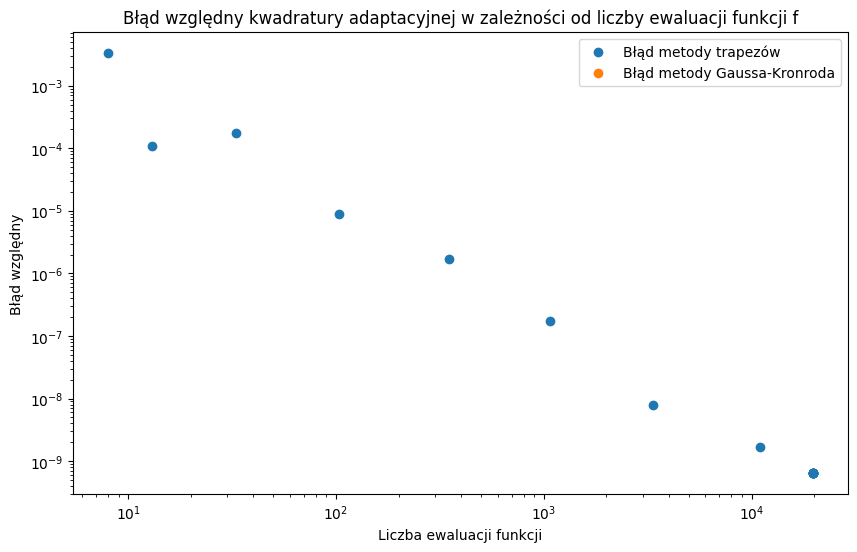

In [32]:
INTEGRAL_START = 10 ** -16
INTEGRAL_END = 1.



def f(x):
    return 4. / (1. + x**2)

def lab7calc(f, expected):
    # absolute value of relative error
    trapz_adaptive_error = np.empty(15, dtype=np.double)
    gauss_adaptive_error = np.empty(15, dtype=np.double)

    trapz_adaptive_evals = np.empty(15, dtype=int)
    gauss_adaptive_evals = np.empty(15, dtype=int)

    for i in range(0, 15):
        res, _, info = quad_vec(f, INTEGRAL_START, INTEGRAL_END, epsabs=10**-i, quadrature="trapezoid", full_output=True)
        trapz_adaptive_error[i] = abs(expected - res) / expected
        trapz_adaptive_evals[i] = info.neval
        
        res, _, info = quad_vec(f, INTEGRAL_START, INTEGRAL_END, epsabs=10**-i, quadrature="gk21", full_output=True)
        gauss_adaptive_error[i] = abs(expected - res) / expected
        gauss_adaptive_evals[i] = info.neval

    return trapz_adaptive_evals, trapz_adaptive_error, gauss_adaptive_evals, gauss_adaptive_error


trapz_adaptive_evals, trapz_adaptive_error, gauss_adaptive_evals, gauss_adaptive_error = lab7calc(f, np.pi)

#lab7 draw?
plt.figure(figsize=(10, 6))
plt.scatter(trapz_adaptive_evals, trapz_adaptive_error, label="Błąd metody trapezów")
plt.scatter(gauss_adaptive_evals, gauss_adaptive_error, label="Błąd metody Gaussa-Kronroda")
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Liczba ewaluacji funkcji")
plt.ylabel("Błąd względny")
plt.title("Błąd względny kwadratury adaptacyjnej w zależności od liczby ewaluacji funkcji f")
plt.show()

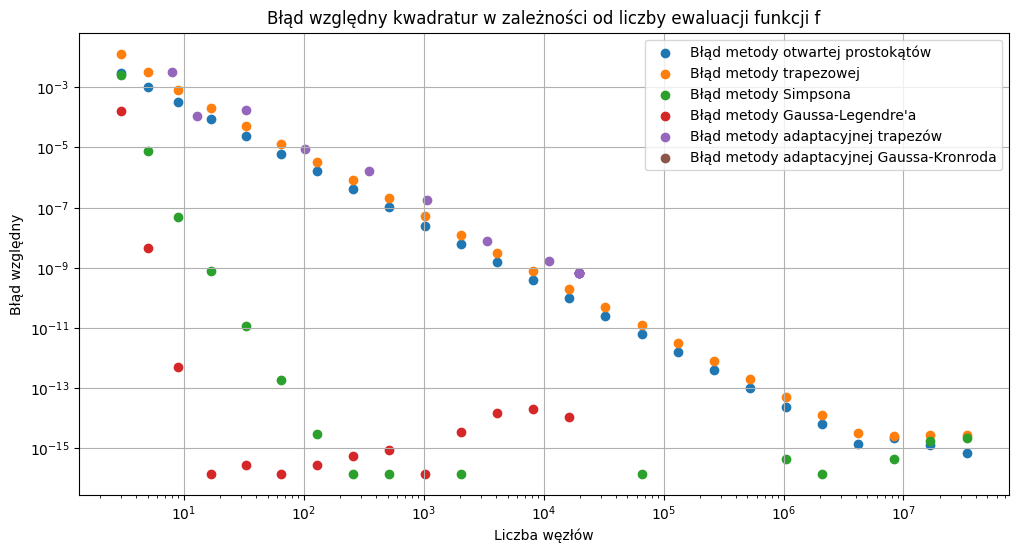

In [33]:
def lab6task1(f, expected):
    # ================ Lab6, Task 1 ================

    midpoint_results = np.empty(25, dtype=np.double)
    trapz_results = np.empty(25, dtype=np.double)
    simps_results = np.empty(25, dtype=np.double)

    def midpoint(f, n):
        h = 1 / n
        x = np.linspace(h/2, 1-h/2, n)
        return h * np.sum(f(x))
        
    for i in range(1, 26):
        # n - number of nodes
        n = 2 ** i + 1
        x = np.linspace(INTEGRAL_START, INTEGRAL_END, n)
        y = f(x)
        midpoint_results[i-1] = midpoint(f, len(x))
        trapz_results[i-1] = trapezoid(y, x)
        simps_results[i-1] = simpson(y, x=x)

    # calculate relative error
    midpoint_error = abs((midpoint_results - expected) / expected)
    trapz_error = abs((trapz_results - expected) / expected)
    simps_error = abs((simps_results - expected) / expected)

    return midpoint_error, trapz_error, simps_error


def lab6task2(f, expected):
    # ================ Lab6, Task 2 ================
    # Gauss-Legendre calculation
    a, b = INTEGRAL_START, INTEGRAL_END
    def gauss_legendre(roots, weighs, f):
        return np.sum(weighs * f(roots))

    xs_g = np.array([2 ** i + 1 for i in range(1, 15)])

    gauss_results = np.empty(len(xs_g))

    for i, x in enumerate(xs_g):
        # returns roots for [-1, 1] interval
        roots, weighs = roots_legendre(x)
        
        # those transformations are in scipy's docs
        transformed_roots = (b-a)/2 * roots + (b+a)/2
        gauss_results[i] = (b-a)/2 * gauss_legendre(transformed_roots, weighs, f)

    gauss_error = abs((gauss_results - expected) / expected)

    return xs_g, gauss_error





xs = np.array([2 ** i + 1 for i in range(1, 26)])

midpoint_error, trapz_error, simps_error = lab6task1(f, np.pi)
gauss_evals, gauss_error = lab6task2(f, np.pi)


plt.figure(figsize=(12, 6))
plt.scatter(xs, midpoint_error, label="Błąd metody otwartej prostokątów")
plt.scatter(xs, trapz_error, label="Błąd metody trapezowej")
plt.scatter(xs, simps_error, label="Błąd metody Simpsona")
plt.scatter(gauss_evals, gauss_error, label="Błąd metody Gaussa-Legendre'a")
plt.scatter(trapz_adaptive_evals, trapz_adaptive_error, label="Błąd metody adaptacyjnej trapezów")
plt.scatter(gauss_adaptive_evals, gauss_adaptive_error, label="Błąd metody adaptacyjnej Gaussa-Kronroda")
plt.xlabel("Liczba węzłów")
plt.ylabel("Błąd względny")
plt.xscale("log")
plt.yscale("log")
plt.title("Błąd względny kwadratur w zależności od liczby ewaluacji funkcji f")
plt.legend()
plt.grid()
plt.show()

# Zadanie 2

In [34]:
def f_a(x):
    return np.sqrt(x) * np.log(x)

expected_a = -4/9

def f_b(x):
    a=0.001
    b=0.004
    return 1/((x-0.3)**2 + a) + 1/((x-0.9)**2 + b) - 6

a=0.001
b=0.004
expected_b = 1/np.sqrt(a) * (np.arctan((1-0.3)/np.sqrt(a)) + np.arctan((0.3)/np.sqrt(a))) + \
            1/np.sqrt(b) * (np.arctan((1-0.9)/np.sqrt(b)) + np.arctan((0.9)/np.sqrt(b))) - 6


In [35]:
# Previous calculations for f_a

midpoint_error_a, trapz_error_a, simps_error_a = lab6task1(f_a, expected_a)

gauss_evals_a, gauss_error_a = lab6task2(f_a, expected_a)

trapz_adaptive_evals_a, trapz_adaptive_error_a, gauss_adaptive_evals_a, gauss_adaptive_error_a = lab7calc(f_a, expected_a)


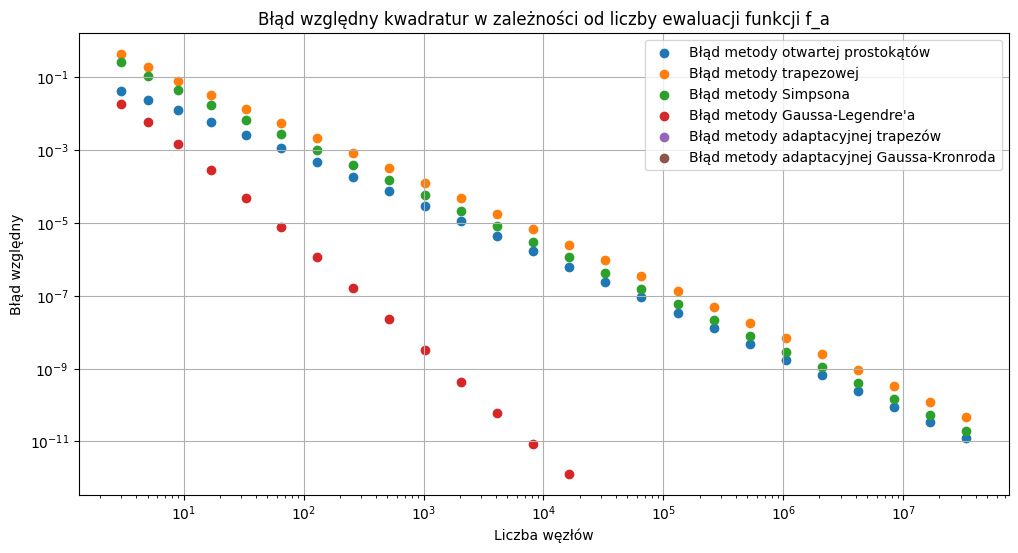

In [36]:
plt.figure(figsize=(12, 6))
plt.scatter(xs, midpoint_error_a, label="Błąd metody otwartej prostokątów")
plt.scatter(xs, trapz_error_a, label="Błąd metody trapezowej")
plt.scatter(xs, simps_error_a, label="Błąd metody Simpsona")
plt.scatter(gauss_evals_a, gauss_error_a, label="Błąd metody Gaussa-Legendre'a")
plt.scatter(trapz_adaptive_evals_a, trapz_adaptive_error_a, label="Błąd metody adaptacyjnej trapezów")
plt.scatter(gauss_adaptive_evals_a, gauss_adaptive_error_a, label="Błąd metody adaptacyjnej Gaussa-Kronroda")
plt.xlabel("Liczba węzłów")
plt.ylabel("Błąd względny")
plt.xscale("log")
plt.yscale("log")
plt.title("Błąd względny kwadratur w zależności od liczby ewaluacji funkcji f_a")
plt.legend()
plt.grid()
plt.show()

In [37]:
# Previous calculations for f_b

midpoint_error_b, trapz_error_b, simps_error_b = lab6task1(f_b, expected_b)

gauss_evals_b, gauss_error_b = lab6task2(f_b, expected_b)

trapz_adaptive_evals_b, trapz_adaptive_error_b, gauss_adaptive_evals_b, gauss_adaptive_error_b = lab7calc(f_b, expected_b)

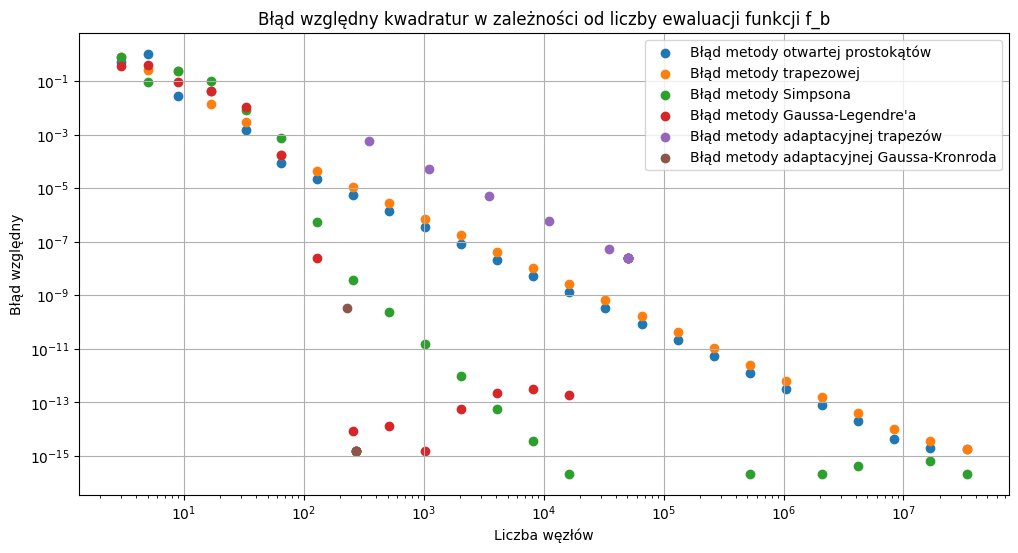

In [38]:
plt.figure(figsize=(12, 6))
plt.scatter(xs, midpoint_error_b, label="Błąd metody otwartej prostokątów")
plt.scatter(xs, trapz_error_b, label="Błąd metody trapezowej")
plt.scatter(xs, simps_error_b, label="Błąd metody Simpsona")
plt.scatter(gauss_evals_b, gauss_error_b, label="Błąd metody Gaussa-Legendre'a")
plt.scatter(trapz_adaptive_evals_b, trapz_adaptive_error_b, label="Błąd metody adaptacyjnej trapezów")
plt.scatter(gauss_adaptive_evals_b, gauss_adaptive_error_b, label="Błąd metody adaptacyjnej Gaussa-Kronroda")
plt.xlabel("Liczba węzłów")
plt.ylabel("Błąd względny")
plt.xscale("log")
plt.yscale("log")
plt.title("Błąd względny kwadratur w zależności od liczby ewaluacji funkcji f_b")
plt.legend()
plt.grid()
plt.show()